In [2]:
import os
import subprocess
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
# # from tf_explain.core.activations import ExtractActivations
# # from tensorflow.keras.applications.xception import decode_predictions
# from keras.models import model_from_json
# from keras.models import load_model
# from keras.preprocessing import image

# ### Deep Learning models ###
# import tensorflow.keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from tensorflow.keras.callbacks import TensorBoard
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, ZeroPadding2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D, AveragePooling2D
# #from tensorflow. keras.utils import np_utils
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import SGD, RMSprop
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras import models
# from keras.utils.vis_utils import plot_model
# from tensorflow.keras.layers import Input, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras import layers
# from tensorflow.keras.applications import densenet
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



%matplotlib inline

In [3]:
shape_x = 48
shape_y = 48

In [4]:
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [5]:
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [6]:
def exit_flow(x) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)

    x = Dense(7, activation='softmax', activity_regularizer=l2(0.001))(x)
    
    return x

In [7]:
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

In [8]:
xception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 24, 24, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [10]:
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
xception.load_weights('final_xception.h5')

In [12]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [19]:
results = xception.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss, test acc: [1.0047675386947255, 0.6316523]


In [12]:
os.chdir("../")
os.getcwd()

'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/Log_Analyser'

In [13]:
# NON-AR Image Prediction

emotionCountData = []
df_EmotionCount = []
path = "../"
subpath = ""
os.chdir(path+"AR_Less Data/")
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/img/".format(user.decode("utf-8"))
        os.chdir(subpath)
        sections = subprocess.check_output('ls').splitlines()
        for section in sections:
            subpath = "{}".format(section.decode("utf-8"))
            os.chdir(subpath)
            images = subprocess.check_output('ls').splitlines()
            for imagename in images:
                imagename =imagename.decode("utf-8")
                img = cv2.imread(imagename)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
                for (x, y, w, h) in faces_detected:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
                    roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
                    roi_gray = cv2.resize(roi_gray, (48, 48))
                    img_pixels = image.img_to_array(roi_gray)
                    img_pixels = np.expand_dims(img_pixels, axis=0)
                    img_pixels /= 255
                    predictions = xception.predict(img_pixels)
                    max_index = np.argmax(predictions[0])
                    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
                    predicted_emotion = emotions[max_index]
                    em = [False, False, False, False,False, False,False ]
                    em[max_index] = True
                    emotionCountData = [user.decode("utf-8"), section.decode("utf-8"), imagename, predicted_emotion, em[0], em[1], em[2], em[3], em[4], em[5], em[6]]
                    df_EmotionCount.append(emotionCountData)
            os.chdir("..")
        os.chdir("../..")
        
# Convert the list of records to DataFrame
df_EmotionCount_NAR = pd.DataFrame(df_EmotionCount, columns = ['User', 'Section', 'ImageName', 'Emotion', 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ])




In [1]:
df_EmotionCount_NAR['Emotion'].value_counts()

NameError: name 'df_EmotionCount_NAR' is not defined

In [15]:
# AR Image Prediction

emotionCountData = []
df_EmotionCount = []
path = "../"
subpath = ""
os.chdir(path+"AR Data/")
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/img/".format(user.decode("utf-8"))
        os.chdir(subpath)
        sections = subprocess.check_output('ls').splitlines()
        for section in sections:
            subpath = "{}".format(section.decode("utf-8"))
            os.chdir(subpath)
            images = subprocess.check_output('ls').splitlines()
            for imagename in images:
                imagename =imagename.decode("utf-8")
                img = cv2.imread(imagename)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
                for (x, y, w, h) in faces_detected:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
                    roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
                    roi_gray = cv2.resize(roi_gray, (48, 48))
                    img_pixels = image.img_to_array(roi_gray)
                    img_pixels = np.expand_dims(img_pixels, axis=0)
                    img_pixels /= 255
                    predictions = xception.predict(img_pixels)
                    max_index = np.argmax(predictions[0])
                    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
                    predicted_emotion = emotions[max_index]
                    em = [False, False, False, False,False, False,False ]
                    em[max_index] = True
                        
                    emotionCountData = [user.decode("utf-8"), section.decode("utf-8"), imagename, predicted_emotion, em[0], em[1], em[2], em[3], em[4], em[5], em[6]]
                    df_EmotionCount.append(emotionCountData)
            os.chdir("..")
        os.chdir("../..")
        
# Convert the list of records to DataFrame
df_EmotionCount_AR = pd.DataFrame(df_EmotionCount, columns = ['User', 'Section', 'ImageName', 'Emotion' , 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])





In [16]:
df_EmotionCount_AR['Emotion'].value_counts()

neutral     2085
sad          545
happy        214
fear         139
angry         89
surprise      59
disgust        5
Name: Emotion, dtype: int64

In [17]:
mapping = {'User_2': "User_1", 'User_3': "User_2", 'User_4': "User_3", 'User_5': "User_4", 'User_6': "User_5", 'User_7': "User_6", 'User_8': "User_7", 'User_9': "User_8", 'User_10': "User_9",'User_11': "User_10",'User_12': "User_11",'User_13': "User_12",}
# Sec_Mapping = {'Section0': "Section_0",'Section 1': "Section_1",'Section2': "Section_2",'Section3': "Section_3",}

df_EmotionCount_NAR = df_EmotionCount_NAR[df_EmotionCount_NAR['User'] != "User_1"]
df_EmotionCount_NAR['User'] = df_EmotionCount_NAR['User'].apply(lambda x: mapping[x])
# df_EmotionCount_NAR['Section'] = df_EmotionCount_NAR['Section'].apply(lambda x: Sec_Mapping[x])


df_EmotionCount_AR = df_EmotionCount_AR[df_EmotionCount_AR['User'] != "User_1"]
df_EmotionCount_AR['User'] = df_EmotionCount_AR['User'].apply(lambda x: mapping[x])
# df_EmotionCount_AR['Section'] = df_EmotionCount_AR['Section'].apply(lambda x: Sec_Mapping[x])


In [18]:
df_EmotionCount_NAR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/NARXceptdata.csv')
df_EmotionCount_AR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/ARXceptdata.csv')

In [3]:
os.chdir("../../DataSet/XCEPTION")
os.getcwd()

'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/XCEPTION'

Text(0.5, 13.5, '')

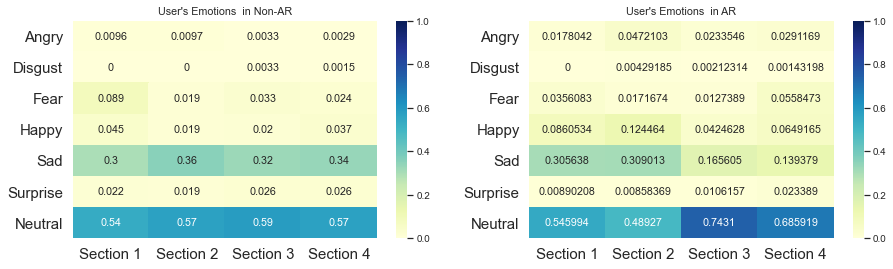

In [6]:
ind_NAR = pd.read_csv('NARXceptdata.csv',index_col=0)
ind_AR = pd.read_csv('ARXceptdata.csv',index_col=0)
ind_AR = ind_AR.replace(to_replace ="Section3", 
                 value ="Section_3") 
sns.set(font_scale=0.9)
gp_cols1 = ['User', 'd_ts']
gp_cols2 = ['User']
gp_cols3 = ['d_ts']
emo_cols = ['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise', 'Neutral']
gp_cols4 = ['User', 'Section']
gp_cols5 = ['Section']

# user1_NAR = ind_NAR.loc[ind_NAR['User'] == "User_1"]
# user1_AR = ind_AR.loc[ind_AR['User'] == "User_1"]

user1_NAR = ind_NAR.groupby(gp_cols5)[emo_cols].sum()
user1_AR = ind_AR.groupby(gp_cols5)[emo_cols].sum()


emo_total_NAR = user1_NAR.groupby(gp_cols5).apply(lambda x: x / x.values.sum())
emo_total_AR = user1_AR.groupby(gp_cols5).apply(lambda x: x / x.values.sum())

# Plot 
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(emo_total_NAR.transpose(), cmap='YlGnBu', ax =axes[0] ,vmax = 1, annot = True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Emotions  in Non-AR")
ax.set_xlabel("")  



# Plot 
ax = sns.heatmap(emo_total_AR.transpose(), cmap='YlGnBu', ax =axes[1], fmt='g',vmax = 1, annot = True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Emotions  in AR")
ax.set_xlabel("") 



In [ ]:
os.chdir("../AR Data")
os.getcwd()

In [ ]:
#AR_Score Calculation

subpath = ""
ind_score= []
tot_score_AR =[]
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/".format(user.decode("utf-8"))
        os.chdir(subpath)
        filess = subprocess.check_output('ls').splitlines()
        for files in filess:
            if files.decode("utf-8").startswith("Log"):
                
                f = open(files.decode("utf-8"), "r")
                contents = f.readlines()
                f.close()
                for line in contents:
                    if(line.startswith("Section")):
                        split = line.split('_')
                        
                        if(split[1].startswith("section")):
                            split = ""
                        else:
                            
                            str = split[7]
                            time = split[2]+'-'+split[3]+'-'+split[4]+'-'+split[5]+'-'+split[6]+'-'+str.splitlines()[0]
                            
                            if(split[1].startswith("Jump")):
                                default_score= [user.decode("utf-8"), split[0], True, False, False,  time, ]
                            elif(split[1].startswith("Positive")):
                                default_score= [user.decode("utf-8"), split[0], False, True, False, time, ]
                            elif(split[1].startswith("Negative")):
                                default_score= [user.decode("utf-8"), split[0], False, False, True, time, ]
                            else:
                                continue
                            
                            ind_score.append(default_score)
                        
                
        os.chdir("..")

tot_score_AR = pd.DataFrame(ind_score, columns = ['User', 'Section', 'Jump','Positive','Negative', 'Time'])
#tot_score = tot_score.groupby(['Time','User','Section']).sum()
tot_score_AR



In [ ]:
os.chdir("../AR_Less Data/")
os.getcwd()

In [ ]:
#NAR_Score Calculation
subpath = ""
ind_score= []
tot_score_NAR =[]
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/".format(user.decode("utf-8"))
        os.chdir(subpath)
        filess = subprocess.check_output('ls').splitlines()
        for files in filess:
            if files.decode("utf-8").startswith("Log"):
                
                f = open(files.decode("utf-8"), "r")
                contents = f.readlines()
                f.close()
                for line in contents:
                    if(line.startswith("Section")):
                        split = line.split('_')
                        
                        if(split[1].startswith("section")):
                            split = ""
                        else:
                            
                            str = split[7]
                            time = split[2]+'-'+split[3]+'-'+split[4]+'-'+split[5]+'-'+split[6]+'-'+str.splitlines()[0]
                            
                            if(split[1].startswith("Jump")):
                                default_score= [user.decode("utf-8"), split[0], True, False, False, time, ]
                            elif(split[1].startswith("Positive")):
                                default_score= [user.decode("utf-8"), split[0], False, True, False, time, ]
                            elif(split[1].startswith("Negative")):
                                default_score= [user.decode("utf-8"), split[0], False, False, True, time, ]
                            else:
                                continue
                                
                            ind_score.append(default_score)
                        
                
        os.chdir("..")

tot_score_NAR = pd.DataFrame(ind_score, columns = ['User', 'Section', 'Jump','Positive','Negative', 'Time'])
#tot_score = tot_score.groupby(['Time','User','Section']).sum()
tot_score_NAR
        
        

In [ ]:
mapping = {'User_2': "User_1", 'User_3': "User_2", 'User_4': "User_3", 'User_5': "User_4", 'User_6': "User_5", 'User_7': "User_6", 'User_8': "User_7", 'User_9': "User_8", 'User_10': "User_9",'User_11': "User_10",'User_12': "User_11",'User_13': "User_12",}
Sec_Mapping = {'Section0': "Section_0",'Section 1': "Section_1",'Section2': "Section_2",'Section3': "Section_3",}
sec_Score_NAR = tot_score_NAR.copy()
sec_Score_NAR = sec_Score_NAR[sec_Score_NAR['User'] != "User_1"]
sec_Score_NAR['User'] = sec_Score_NAR['User'].apply(lambda x: mapping[x])
sec_Score_NAR['Section'] = sec_Score_NAR['Section'].apply(lambda x: Sec_Mapping[x])

sec_Score_AR = tot_score_AR.copy()
sec_Score_AR = sec_Score_AR[sec_Score_AR['User'] != "User_1"]
sec_Score_AR['User'] = sec_Score_AR['User'].apply(lambda x: mapping[x])
sec_Score_AR['Section'] = sec_Score_AR['Section'].apply(lambda x: Sec_Mapping[x])






In [ ]:
sec_Score_NAR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/NARScoredata.csv')
sec_Score_AR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/ARScoredata.csv')

In [ ]:


sns.set(font_scale=0.9)
gp_cols1 = ['User', 'd_ts']
gp_cols2 = ['User']
gp_cols3 = ['d_ts']
score_cols = ['Positive','Negative']
Jump = ['Jump']
gp_cols4 = ['User', 'Section']
gp_cols5 = ['Section']

# user1_NAR = ind_NAR.loc[ind_NAR['User'] == "User_1"]
# user1_AR = ind_AR.loc[ind_AR['User'] == "User_1"]

sec_Score_NAR1 = sec_Score_NAR.groupby(gp_cols4)[score_cols].sum()
sec_Score_AR1 = sec_Score_AR.groupby(gp_cols4)[score_cols].sum()

sec_Score_NAR2 = sec_Score_NAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
sec_Score_AR2 = sec_Score_AR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())

sec_Score_NAR3 = sec_Score_NAR2.groupby(gp_cols5).sum()
sec_Score_AR3 = sec_Score_AR2.groupby(gp_cols5).sum()


# Plot#1
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(sec_Score_NAR3.transpose(), cmap='PuBu', ax =axes[0],annot =True,vmax = 3.2)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Collection in Non-AR")
ax.set_xlabel("")  

# Plot#2
ax = sns.heatmap(sec_Score_AR3.transpose(), cmap='PuBu', ax =axes[1],annot =True, vmax = 3.2)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Collection in AR")
ax.set_xlabel("") 








In [ ]:
sec_Jump_NAR1 = sec_Score_NAR.groupby(gp_cols4)[Jump].sum()
sec_Jump_AR1 = sec_Score_AR.groupby(gp_cols4)[Jump].sum()

sec_Jump_NAR2 = sec_Jump_NAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
sec_Jump_AR2 = sec_Jump_AR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())


sec_Jump_NAR3 = sec_Jump_NAR2.groupby(gp_cols5).sum()
sec_Jump_AR3 = sec_Jump_AR2.groupby(gp_cols5).sum()



Jump_Table = sec_Jump_AR3.copy()
Jump_Table['Jump_NAR'] = sec_Jump_NAR3['Jump']
Jump_Table.rename(columns = {'Jump':'Jump_AR'}, inplace = True)
Jump_Table= Jump_Table.reset_index()


Jump_Table.plot(x='Section', y=["Jump_NAR", "Jump_AR"], kind="bar")




In [ ]:
duplicateDFRow = df_EmotionCount_AR[df_EmotionCount_AR.duplicated()]
print(duplicateDFRow)


In [ ]:
ind_NAR